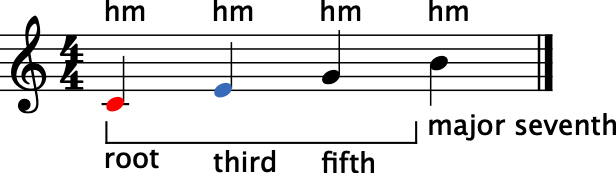

In [1]:
from music21 import *

s = stream.Score()

part = stream.Part()

notes = [("C4", "root"), ("E4", "third"), ("G4", "fifth"), ("B4", "major seventh")]

for p, a in notes:
    n = note.Note(p, quarterLength=1)

    if p == "C4":
        n.style.color = "red"

    if p == "E4":
        n.style.color = "#386aba"

    te1 = expressions.TextExpression(a)
    te1.style.justify = "center"
    te1.style.fontSize = 10
    te1.style.fontFamily = "Segoe UI"
    te1.placement = "below"
    part.append(te1)

    te2 = expressions.TextExpression("hm")
    te2.style.fontSize = 10
    te2.style.fontFamily = "Segoe UI"
    te2.placement = "above"
    part.append(te2)

    part.append(n)

cnote = part.recurse().notes[0]
enote = part.recurse().notes[2]
spn = spanner.Line([cnote, enote])
spn.lineType = "solid"
spn.placement = "below"
spn.tick = "up"
part.insert(0.0, spn)

s.append(part)

s.show()

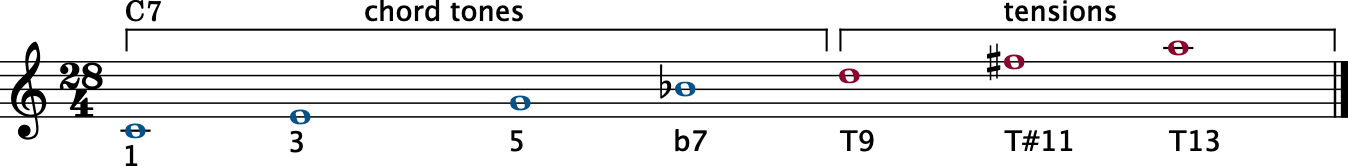

In [2]:
from music21 import *

s = stream.Score()

part = stream.Part()

part.append(meter.TimeSignature("28/4"))

c7_chord = harmony.ChordSymbol("C7")
c7_chord.style.fontFamily = "Segoe UI"

part.append(c7_chord)

notes = [
    ("C4", "1"),
    ("E4", "3"),
    ("G4", "5"),
    ("B-4", "b7"),
    ("D5", "T9"),
    ("F#5", "T#11"),
    ("A5", "T13"),
]

for p, a in notes:
    n = note.Note(p, quarterLength=4)
    texp = expressions.TextExpression(a)
    texp.style.fontSize = 10
    texp.style.fontFamily = "Segoe UI"
    texp.placement = "below"

    if not "T" in a:
        n.style.color = "#06538a"
    else:
        n.style.color = "#8a062d"

    part.append(texp)

    part.append(n)

tones_start = part.recurse().notes[1]
tones_end = part.recurse().notes[4]
tones_line = spanner.Line([tones_start, tones_end])
tones_line.lineType = "solid"

tones_texp = expressions.TextExpression("chord tones")
tones_texp.style.fontSize = 10
tones_texp.style.fontFamily = "Segoe UI"
tones_texp.placement = "above"

tens_start = part.recurse().notes[5]
tens_end = part.recurse().notes[7]
tens_line = spanner.Line([tens_start, tens_end])
tens_line.lineType = "solid"

tens_texp = expressions.TextExpression("tensions")
tens_texp.style.fontSize = 10
tens_texp.style.fontFamily = "Segoe UI"
tens_texp.placement = "above"

part.insert(1, tones_line)
part.insert(5, tones_texp)
part.insert(6, tens_line)
part.insert(20, tens_texp)

s.append(part)

s.show()

In [3]:
from music21 import *
from IPython.display import Image


def music(notes: str, midi: bool = False):
    s = stream.Score()
    part = stream.Part()

    # get info
    info_start = 5

    for i in range(info_start, len(notes)):
        if notes[i : i + 5] == "INFO ":
            info_end = i

    info = list(filter(lambda x: len(x) > 0, notes[info_start:info_end].split(" ")))

    # set clef
    if info[0].lower == "treble":
        part.append(clef.TrebleClef())
    elif info[0].lower == "bass":
        part.append(clef.BassClef())

    # set key
    keys = [
        ["cb", -7],
        ["gb", -6],
        ["db", -5],
        ["ab", -4],
        ["eb", -3],
        ["bb", -2],
        ["f", -1],
        ["c", 0],
        ["g", 1],
        ["d", 2],
        ["a", 3],
        ["e", 4],
        ["b", 5],
        ["f#", 6],
        ["c#", 7],
    ]
    for k in keys:
        if info[1].lower() == k[0]:
            part.append(key.KeySignature(k[1]))

    # set time signature
    part.append(meter.TimeSignature(info[2]))

    # add notes
    notes = notes[info_end + 5 :].split(" ")
    add_notes = []
    for n in notes:
        # add chord name
        if n[0] == "!":
            add_notes.append(harmony.ChordSymbol(n[1:]))
        # start next measure on a new line
        elif n == "^":
            add_notes.append(layout.SystemLayout(isNew=True))
        else:
            # set variables
            is_chord, is_tie, is_col = False, "none", ""
            # if the note is a chord
            if "(" in n:
                is_chord = True
                note_name = n.replace("(", "").replace(")", "").split(",")
                if "t" in note_name[-1]:
                    note_length = note_name[-1][-2:]
                    note_name[-1] = note_name[-1][:-2]
                else:
                    note_length = note_name[-1][-1]
                    note_name[-1] = note_name[-1][:-1]
            else:
                if "{" in n:
                    is_tie = "start"
                if "}" in n:
                    is_tie = "stop"
                if n[-1] == "t":
                    if n[0] == "B":
                        is_col = "#06538a"
                        note_name = n[1:-2].replace("{", "").replace("}", "")
                    elif n[0] == "R":
                        is_col = "#8a062d"
                        note_name = n[1:-2].replace("{", "").replace("}", "")
                    else:
                        note_name = n[:-2].replace("{", "").replace("}", "")
                    note_length = n[-2:]
                else:
                    if n[0] == "B":
                        is_col = "#06538a"
                        note_name = n[1:-1].replace("{", "").replace("}", "")
                    elif n[0] == "R":
                        is_col = "#8a062d"
                        note_name = n[1:-1].replace("{", "").replace("}", "")
                    else:
                        note_name = n[:-1].replace("{", "").replace("}", "")
                    note_length = n[-1:]
            lengths = [["w", 4], ["h", 2], ["q", 1], ["e", 0.5], ["s", 0.25]]
            for l in lengths:
                if isinstance(note_length, str):
                    if l[0] in note_length:
                        if "t" in note_length:
                            note_length = l[1] * 0.333333333
                        else:
                            note_length = l[1]
            if is_tie == "none":
                if is_col == "":
                    add_notes.append([note_name, note_length])
                else:
                    add_notes.append([note_name, note_length, is_col])
            else:
                if is_col == "":
                    add_notes.append([note_name, note_length, is_tie])
                else:
                    add_notes.append([note_name, note_length, is_tie, is_col])
    for n in add_notes:
        if isinstance(n, list):
            if isinstance(n[0], list):
                add_n = chord.Chord(n[0], quarterLength=n[1])
            else:
                if n[0].lower() == "r":
                    add_n = note.Rest(quarterLength=n[1])
                elif n[0] in ["slash", "s"]:
                    add_n = note.Unpitched()
                    add_n.notehead = "slash"
                    add_n.stemDirection = "noStem"
                    add_n.volume.velocity = 0
                else:
                    add_n = note.Note(n[0], quarterLength=n[1])
            if len(n) == 3:
                if n[2] in ["start", "stop"]:
                    add_n.tie = tie.Tie(n[2])
                else:
                    add_n.style.color = n[2]
            if len(n) == 4:
                add_n.tie = tie.Tie(n[2])
                add_n.style.color = n[3]
            part.append(add_n)
        else:
            part.append(n)

    s.append(part)
    swung_part = stream.Part()

    if midi:
        step = 0.0
        for item in part:
            if isinstance(item, note.Note) or isinstance(item, note.Rest):
                if str(step)[-1] == "9":
                    step = float(round(step))
                elif str(step)[-1] == "2":
                    step = float(round(step))
                if isinstance(item, note.Note):
                    new_note = note.Note(item.pitch)
                    if item.tie:
                        if "start" in str(item.tie):
                            new_note.tie = tie.Tie("start")
                        if "stop" in str(item.tie):
                            new_note.tie = tie.Tie("stop")
                        if "continue" in str(item.tie):
                            new_note.tie = tie.Tie("continue")
                else:
                    new_note = note.Rest()
                if str(step)[-2:] == ".0":
                    if item.quarterLength == 0.5:
                        new_note.quarterLength = 0.333333333 * 2
                    elif item.quarterLength == 1.5:
                        new_note.quarterLength = 1 + (0.333333333 * 2)
                    elif str(item.quarterLength) == "1/3":
                        new_note.quarterLength = 0.333333333
                    else:
                        new_note.quarterLength = item.quarterLength
                elif str(step)[-2:] == ".5":
                    if item.quarterLength == 0.5:
                        new_note.quarterLength = 0.333333333
                    elif item.quarterLength == 1.5:
                        new_note.quarterLength = 1 + 0.333333333
                    else:
                        new_note.quarterLength = item.quarterLength
                if str(item.quarterLength) == "1/3":
                    new_note.quarterLength = 0.333333333
                swung_part.append(new_note)
                step += item.quarterLength
            else:
                swung_part.append(item)
        swung_s = stream.Stream()
        guitar = instrument.Guitar()
        swung_s.append(guitar)
        swung_s.append(swung_part)
        return swung_s.show("midi")
    else:
        return Image(filename=s.write("musicxml.png"))

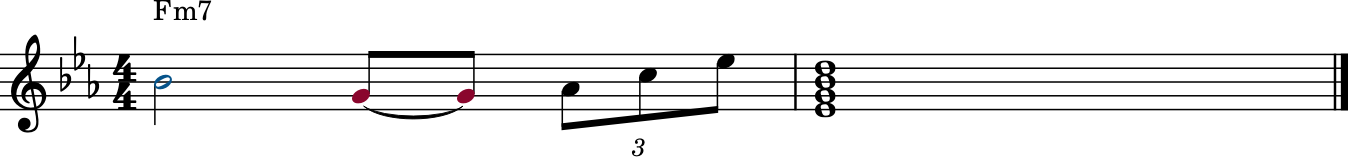

In [7]:
notes = (
    "INFO treble eb 4/4 INFO !fm7 Bb-4h Rg4{e Rg4}e a-4qt c5qt e-5qt (e-4,g4,b-4,d5)w"
)
music(notes, True)
music(notes)

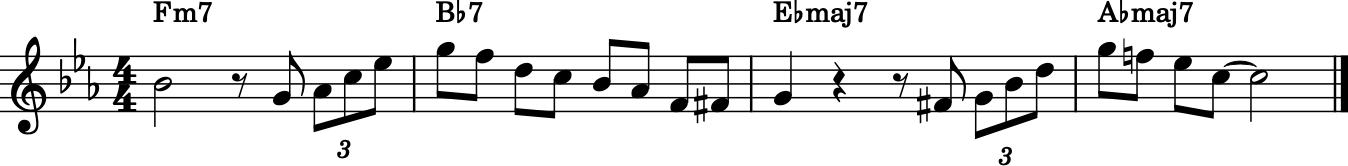

In [114]:
notes = "INFO treble eb 4/4 INFO !fm7 b-4h re g4e a-4qt c5qt e-5qt !b-7 g5e f5e d5e c5e b-4e a-4e f4e f#4e !e-maj7 g4q rq re f#4e g4qt b-4qt d5qt !a-maj7 g5e f5e e-5e c5{e c5}h"
music(notes, True)
music(notes)